<a href="https://colab.research.google.com/github/amitkumar8486/EDA-Hotel-Booking-Analysis/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mouting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#importing dataset
hotel_path = '/content/drive/MyDrive/AlmaBetter/capstone-project/EDA-Hotel-Booking-Analysis/dataset/Hotel Bookings.csv'
hotel_df = pd.read_csv(hotel_path)

In [7]:
#displaying the dataset-using head()
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
#displaying the dataset-using tail()
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
#shape of the dataset
hotel_df.shape

(119390, 32)

*   **The dataset contains 119390 rows and 32 columns**






In [10]:
#counting the missing values
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

* we have lots of NaN values in agent and company columns. These NaN values affect our analysis in future. So it is better to remove these two columns
* Before removing we will copy the original dataset so that our original dataset remains unchanged.

# **Overview of the type of Hotels**

([<matplotlib.patches.Wedge at 0x7ff10aba6f90>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.45%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.55%')])

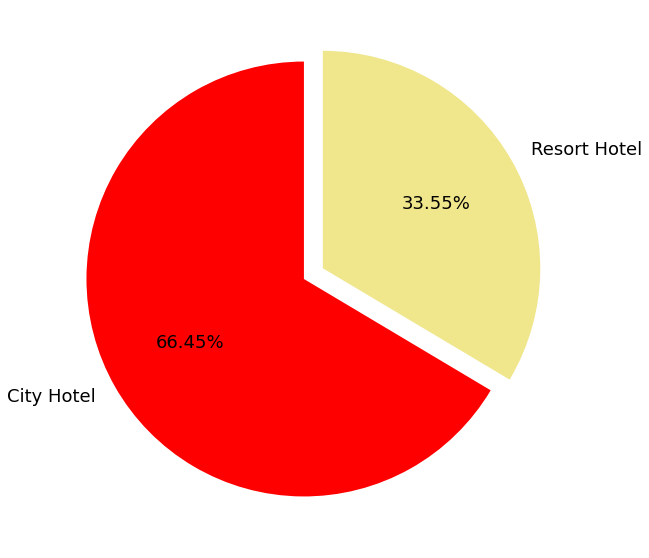

In [21]:
#configuring the pie chart
plt.rcParams['figure.figsize'] = 10,10

# Indexing labels. tolist() will convert the index to list
labels = hotel_df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['hotel'].value_counts().tolist()

# Explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['r','khaki']

#ploting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',startangle=90, textprops={'fontsize': 18})

 Here we can see that huge proportion of hotels is city hotel. Resort hotel is expensive so most people will book mostly city hotel.

# **Overview of Arrival Period**

1. **Number of Arrvial per Year**




Text(0.5, 1.0, 'Number of arrival per year')

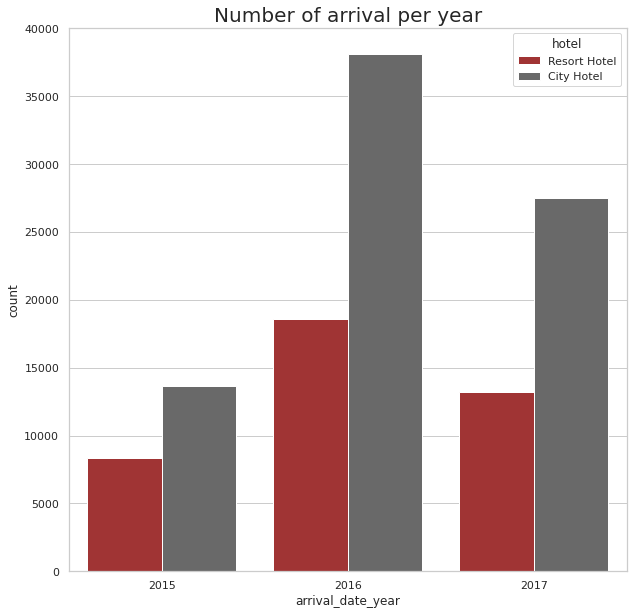

In [22]:
#1.arrival per year
arr_list = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_of_arrival = hotel_df[arr_list]
sns.set_theme(style="whitegrid")
sns.countplot(data = period_of_arrival,palette=['firebrick',"dimgrey"],x = 'arrival_date_year', hue = 'hotel').set_title('Number of arrival per year',fontsize=20)

Here we can see that 2016 seems to be the year where hotel booking is at its highest.

2. **Number of arrival per month**

Text(0, 0.5, 'Count')

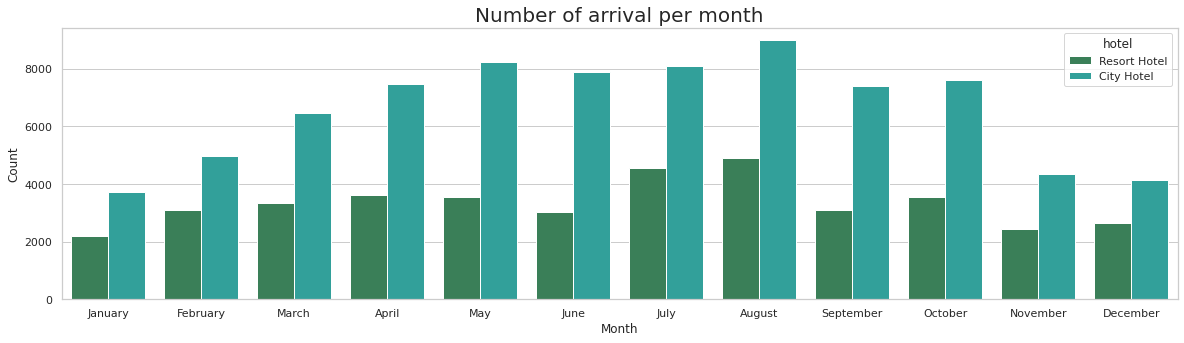

In [23]:
#2.arrival per month
plt.figure(figsize=(20,5))

sns.countplot(data = period_of_arrival,palette=['seagreen',"lightseagreen"], x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

From the above graph it can be concluded that August has the  heighest number of booking. The reason could be Summer ends around August, followed straight by autumn.

# **Deposite Types**

Text(0.5, 1.0, 'Types of deposits')

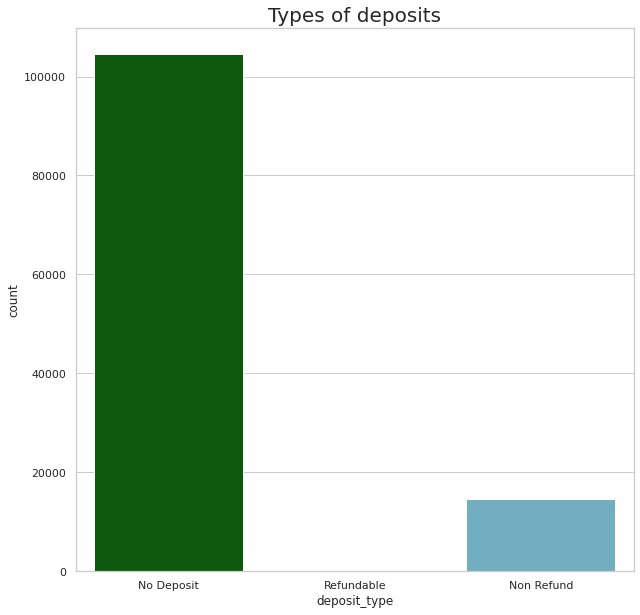

In [29]:
#deposite types
sns.countplot(data = hotel_df,palette=['darkgreen','skyblue',"c"], x = 'deposit_type').set_title('Types of deposits', fontsize = 20)

Majority of the booking does not require deposit. 

# **Types of Customers**

Text(0.5, 1.0, 'Type of Customers')

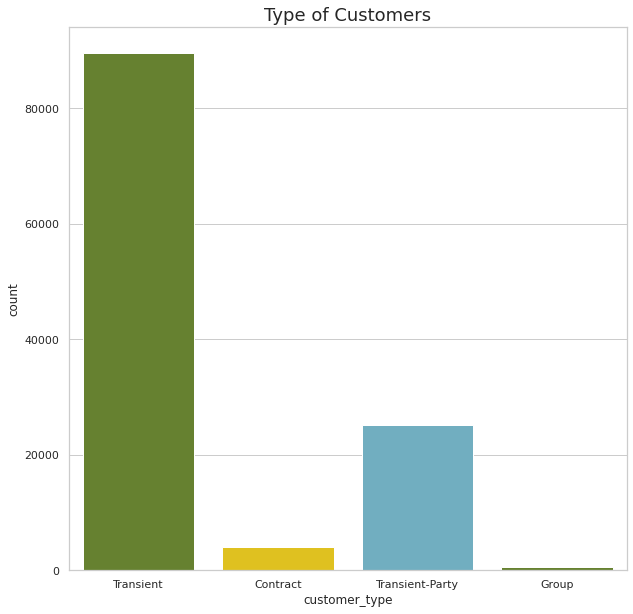

In [28]:
#type of customers
sns.countplot(data = hotel_df,palette=['olivedrab','gold','c'], x = 'customer_type').set_title('Type of Customers', fontsize = 18)

Majority of the bookings are transient. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking.